In [1]:
import turicreate as tc

In [2]:
image_train=tc.SFrame('image_train_data.sframe')
image_test=tc.SFrame('image_test_data.sframe')

In [4]:
sketch=tc.Sketch(image_train['label'])

In [5]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [8]:
image_test[0:1].show()

Materializing SFrame

Warning: Skipping column 'image'. Unable to show columns of type 'image'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 12.986ms     |

| Done         |         | 100         | 58.225ms     |

+--------------+---------+-------------+--------------+

,SArray
0,

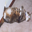

In [31]:
image_train_cat=image_train.filter_by(['cat'],'label')
knn_model_cat=tc.nearest_neighbors.create(image_train_cat,features=['deep_features'],
                                         label='id')
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

cat_neighbors=get_images_from_ids(knn_model_cat.query(image_test[0:1],k=1))
cat_neighbors['image'].explore()

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.584ms     |

| Done         |         | 100         | 60.106ms     |

+--------------+---------+-------------+--------------+

,SArray
0,

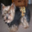

In [32]:
image_train_dog=image_train.filter_by(['dog'],'label')
knn_model_dog=tc.nearest_neighbors.create(image_train_dog,features=['deep_features'],
                                         label='id')
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

dog_neighbors=get_images_from_ids(knn_model_dog.query(image_test[0:1],k=1))
dog_neighbors['image'].explore()

In [33]:
knn_model_cat.query(image_test[0:1],k=5)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.263ms      |

| Done         |         | 100         | 56.979ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [34]:
knn_model_dog.query(image_test[0:1],k=5)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.269ms      |

| Done         |         | 100         | 51.255ms     |

+--------------+---------+-------------+--------------+

37.77071136184156

In [35]:
knn_classifier_model_dog=tc.nearest_neighbor_classifier.create(image_train,
                                                              features=['deep_features'],
                                                              target='label')
image_test_dog=image_test.filter_by(['dog'],'label')
knn_classifier_model_dog.evaluate(image_test_dog,max_neighbors=1)

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 501000  | 24.9875     | 1.20s        |

| Done         | 2005000 | 100         | 1.26s        |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 501000  | 24.9875     | 1.29s        |

| Done         | 2005000 | 100         | 1.33s        |

+--------------+---------+-------------+--------------+

{'accuracy': 0.678,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |       dog       |  678  |
 |     dog      |    automobile   |   5   |
 |     dog      |       cat       |  248  |
 |     dog      |       bird      |   69  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns]}